In [52]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import warnings 
warnings.filterwarnings(action= 'ignore')

#modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV



In [13]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')
df.head()#check the head

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
0,3,1,0,4,0,1,1,6,1503,4,180.0,175.0,1.0,1.972222,0,4,3,0.740042,3,1,0
1,3,2,0,4,0,1,1,5,1549,4,180.0,175.0,1.0,2.972222,0,22,3,0.725455,3,2,0
2,3,3,0,4,0,1,1,5,1466,2,180.0,177.0,1.0,3.983333,0,25,3,0.605364,3,3,-2
3,5,4,1,4,0,0,1,0,1535,3,180.0,168.0,1.0,4.933333,0,2,5,0.662651,1,1,0
4,6,3,1,4,0,0,1,6,1412,1,180.0,179.0,1.0,3.994444,0,2,3,0.501916,3,1,0


In [14]:
from sklearn.model_selection import train_test_split

# X = df.loc[ : , df.columns != 'OverallLevel']
# y = df[['OverallLevel']]
# #split 70% train 30% test
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [15]:
#create a new dataframe, will convert the Y variable to categorical
df.X = df.copy()
df.X.shape

(9460, 21)

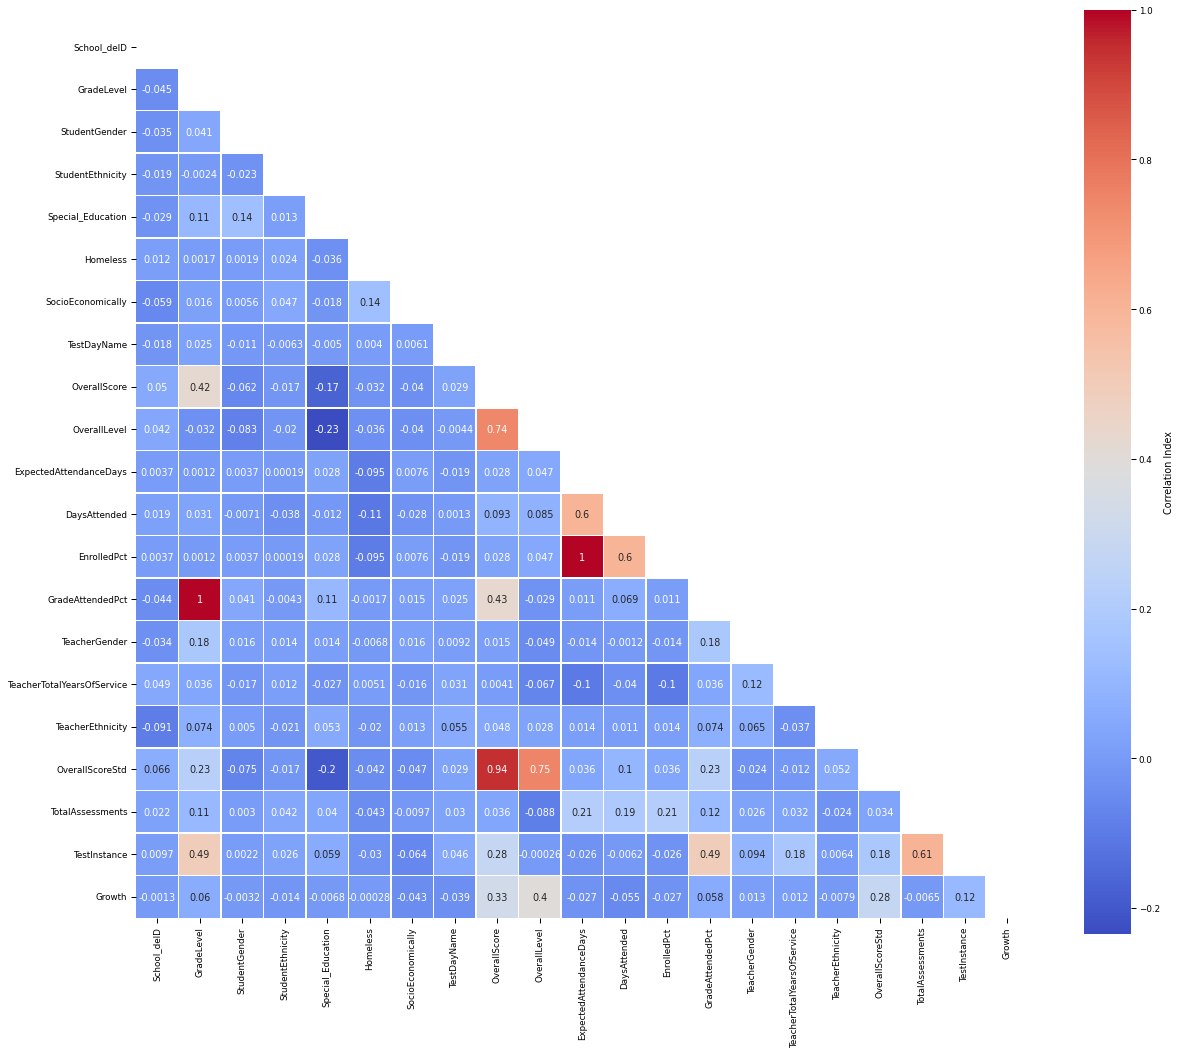

In [16]:
#check for correlations
corr = df.X.corr()
sns.set_context('paper', font_scale=1)
plt.figure(figsize=(20,17))
plt.tight_layout(pad = 10, w_pad=10, h_pad=10)
matrix = np.triu(corr)
sns.heatmap(df.X.corr(method='pearson'), annot=True,
linewidths=.5, cmap="coolwarm", mask=matrix,
square = True, cbar_kws={'label':
'Correlation Index'})
plt.show()

In [17]:
# convert the OverallLevel to categorical 
df['results'] = 'na'
df.X.loc[(df.X.OverallLevel== 4),'results']= 'pass'
df.X.loc[(df.X.OverallLevel== 3),'results']= 'fair'
df.X.loc[(df.X.OverallLevel<= 2) ,'results']= 'poor'
df.X = df.X.drop(columns=['OverallLevel'])#drop the overall column

In [18]:
print(df.X.shape) #confirm shape and make sure the column has beenn dropped
print(df.X.results)


(9460, 21)
0       pass
1       pass
2       poor
3       fair
4       poor
        ... 
9455    poor
9456    poor
9457    pass
9458    poor
9459    poor
Name: results, Length: 9460, dtype: object


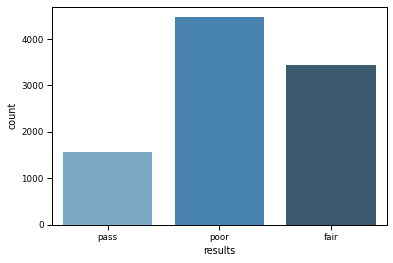

In [19]:
#check the distribution for the new target variable
sns.countplot("results", data=df.X, palette='Blues_d')
plt.show()


In [20]:
#breakdown of the classes
pass_count = len(df.X[df.X['results']=='pass'])
print("pass count is", pass_count,"students")
poor_count = len(df.X[df.X['results']=='poor'])
print("poor count is", poor_count,"students")
fair_count = len(df.X[df.X['results']=='fair'])
print("fair count is",fair_count,"students")
total_count = (pass_count+poor_count+fair_count)
print ("the total student count is", total_count)

pass count is 1561 students
poor count is 4468 students
fair count is 3431 students
the total student count is 9460


In [21]:
#percent class breakdown
pd.options.display.float_format = '{:.2f}'.format
pass_count_percent = (pass_count/total_count)*100
print("the percentage of students in pass are", pass_count_percent,"%")
poor_count_percent = (poor_count/total_count)*100
print("the percentage of students in poor are", poor_count_percent,"%")
fair_count_percent = (fair_count/total_count)*100
print("the percentage of students in fair are", fair_count_percent,"%")

the percentage of students in pass are 16.50105708245243 %
the percentage of students in poor are 47.23044397463002 %
the percentage of students in fair are 36.268498942917546 %


<AxesSubplot:xlabel='results', ylabel='count'>

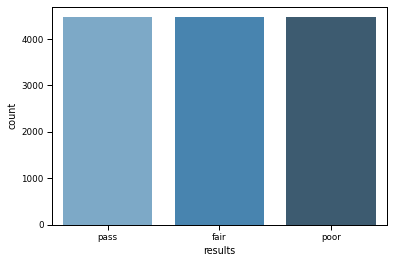

In [22]:
#balance the classes
lev_0 = df.X[df.X['results'] == 'pass']
lev_1 = df.X[df.X['results'] == 'fair']
lev_2 = df.X[df.X['results'] == 'poor']

from sklearn.utils import resample
#upsample the target class
lev0_upsample = resample(lev_0,replace=True,n_samples=len(lev_2),random_state=42)
lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_2),random_state=42)
frames = (lev0_upsample, lev1_upsample, lev_2)
df.X = pd.concat(frames)
#plot target class
fig_size=(12,8)
sns.countplot(df.X['results'], data = df.X, palette = 'Blues_d')

In [23]:
X = df.X.loc[ : , df.X.columns != 'results']
y = df.X[['results']]
#split 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9382, 20) (9382, 1) (4022, 20) (4022, 1)


In [24]:
#check the mean
df.X.groupby('results').mean()

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
results,,,,,,,,,,,,,,,,,,,,
fair,4.15,2.98,0.50,3.95,0.07,0.08,0.81,3.36,1499.51,176.92,165.59,0.98,3.91,0.08,13.75,4.20,0.63,3.07,2.00,0.17
pass,4.36,2.68,0.47,3.91,0.04,0.08,0.79,3.31,1548.78,177.29,165.91,0.98,3.62,0.08,12.69,4.31,0.73,2.54,1.93,0.44
poor,4.13,2.86,0.56,3.94,0.20,0.09,0.84,3.38,1432.96,176.36,162.72,0.98,3.78,0.11,14.51,4.10,0.52,3.07,2.00,-0.21


In [25]:
#there are some skewed data 
df.X.skew()

School_deID                   0.15
GradeLevel                    0.07
StudentGender                -0.04
StudentEthnicity              0.88
Special_Education             2.61
Homeless                      3.02
SocioEconomically            -1.61
TestDayName                  -0.37
OverallScore                 -0.61
ExpectedAttendanceDays       -4.86
DaysAttended                 -2.00
EnrolledPct                  -4.86
GradeAttendedPct              0.07
TeacherGender                 2.89
TeacherTotalYearsOfService    0.48
TeacherEthnicity              0.35
OverallScoreStd              -0.62
TotalAssessments              0.06
TestInstance                  1.01
Growth                        0.47
dtype: float64

In [26]:
#for test purpose create a scaled X and compare the results
X_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled= StandardScaler().fit_transform(X_test)

# Logistic Regression Model

Train Accuracy: 67.85333617565551 %
Test Accuracy: 67.65290900049726 %
Classification Stats:
              precision    recall  f1-score   support

        fair       0.60      0.52      0.56      1349
        pass       0.68      0.72      0.70      1345
        poor       0.74      0.79      0.76      1328

    accuracy                           0.68      4022
   macro avg       0.67      0.68      0.67      4022
weighted avg       0.67      0.68      0.67      4022



<function matplotlib.pyplot.show(close=None, block=None)>

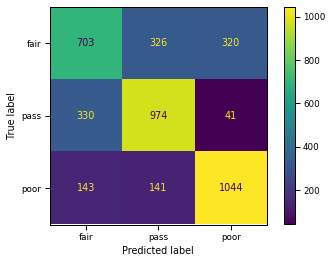

In [54]:
#logistic regression model
logreg = LogisticRegression(random_state=599)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
# print accuracy
logX = logreg.predict(X_train)
print('Train Accuracy:', float(accuracy_score(y_train, logX))*100, '%')
print('Test Accuracy:', float(accuracy_score(y_test, y_pred))*100, '%')
print('Classification Stats:')
print(classification_report(y_test,y_pred))
#plot confusion matrix for logistic regression model
l1=logreg.fit(X_train,y_train)
plot_confusion_matrix(l1,X_test,y_test)
plt.show

In [29]:
#confusion matrix
logreg_matrix = metrics.confusion_matrix(y_test, y_pred)
logreg_matrix

array([[ 703,  326,  320],
       [ 330,  974,   41],
       [ 143,  141, 1044]], dtype=int64)

# Scaled Logistic Regression Model

Train Accuracy: 33.287145597953526 %
Test Accuracy: 86.42466434609646 %
Test Classification Stats:
              precision    recall  f1-score   support

        fair       0.79      0.81      0.80      1349
        pass       0.87      0.85      0.86      1345
        poor       0.93      0.94      0.93      1328

    accuracy                           0.86      4022
   macro avg       0.86      0.86      0.86      4022
weighted avg       0.86      0.86      0.86      4022



<function matplotlib.pyplot.show(close=None, block=None)>

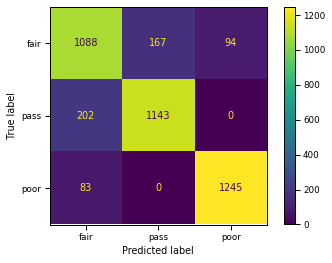

In [31]:
#scaled logistic regression

logreg_Scale = LogisticRegression(random_state=599)
logreg_Scale.fit(X_scaled,y_train)
#evaluate on train data
trainX = logreg_Scale.predict(X_train)
print('Train Accuracy:', float(accuracy_score(y_train, trainX))*100, '%')
y_pred_scaled = logreg_Scale.predict(X_test_scaled)
#check the accuracy
print('Test Accuracy:', float(accuracy_score(y_test, y_pred_scaled))*100, '%')
print('Test Classification Stats:')
print(classification_report(y_test,y_pred_scaled))
#plot confusion matrix for scaled logistic regression model
l2=logreg.fit(X_scaled,y_train)
plot_confusion_matrix(l2,X_test_scaled,y_test)
plt.show

In [32]:
#confusion matrix
logreg_scaled_matrix = metrics.confusion_matrix(y_test, y_pred_scaled)
logreg_scaled_matrix

array([[1088,  167,   94],
       [ 202, 1143,    0],
       [  83,    0, 1245]], dtype=int64)

there appears to be overtrainng in the scaled model the accuracy is 100% looking at the confusion matrix the model learned all the labels as each class label was correctly predicted.

# Penalized Logistic Regression Model

Train Accuracy: 87.0496695800469 %
Test Accuracy: 86.00198906016907 %
Test Classification Stats:
              precision    recall  f1-score   support

        fair       0.78      0.81      0.80      1349
        pass       0.87      0.85      0.86      1345
        poor       0.94      0.92      0.93      1328

    accuracy                           0.86      4022
   macro avg       0.86      0.86      0.86      4022
weighted avg       0.86      0.86      0.86      4022



<function matplotlib.pyplot.show(close=None, block=None)>

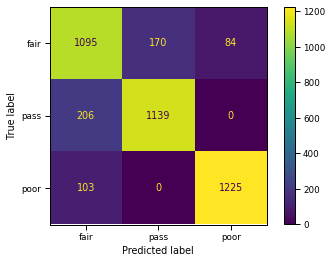

In [33]:
#Penalized logistic regression

logpen = LogisticRegression(penalty ='l2',
solver = 'newton-cg', random_state=599) 
logpenn=logpen.fit(X_train,y_train)
#evaluate on train data
trainX1 = logpen.predict(X_train)
print('Train Accuracy:', float(accuracy_score(y_train, trainX1))*100, '%')
y_pred_pen = logpen.predict(X_test)
#check the accuracy
print('Test Accuracy:', float(accuracy_score(y_test, y_pred_pen))*100, '%')
print('Test Classification Stats:')
print(classification_report(y_test,y_pred_pen))
#plot confusion matrix for Penalized logistic regression model
l3=logpen.fit(X_train,y_train)
plot_confusion_matrix(l3,X_test,y_test)
plt.show


# Tuned Logistic Regression Model

In [63]:
# setting the parameter grid
param_grid = {'solver': ['newton-cg', 'saga'], 
                   'penalty': ['l1', 'l2', 'elasticnet'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
tuned_log = GridSearchCV(LogisticRegression(random_state=599),param_grid, cv=5, scoring='accuracy') 
tuned_log.fit(X_train,y_train)
# view accuracy scores for all the models
print("Grid scores for all the Logistic Regression Model based on CV:\n")
means = tuned_log.cv_results_['mean_test_score']
stds = tuned_log.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tuned_log.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on training set:", tuned_log.best_params_)
print("Best model test accuracy:", tuned_log.best_score_)

log_best = tuned_log.best_estimator_
tuned_log_y_pred = log_best.predict(X_test)

print('\n\nTuned Model Stats:')
print('Test Classification Stats:')
print(classification_report(y_test,tuned_log_y_pred))







# Tuning hyper-parameters for accuracy

Grid scores for all the Logistic Regression Model based on CV:

nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.60818 (+/-0.02749) for {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.84705 (+/-0.01994) for {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.65061 (+/-0.02518) for {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.64858 (+/-0.02406) for {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.86474 (+/-0.02101) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.65220 (+/-0.02394) for {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan)

<function matplotlib.pyplot.show(close=None, block=None)>

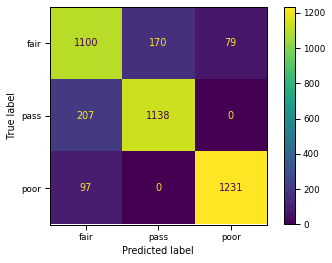

In [62]:
#plot confusion matrix for Penalized logistic regression model
ltuned=log_best.fit(X_train,y_train)
plot_confusion_matrix(ltuned,X_test,y_test)
plt.show


# SVC Model

Train Accuracy: 66.68087827755275 %
Test Accuracy: 67.4042764793635 %
Classification Stats:
              precision    recall  f1-score   support

        fair       0.54      0.56      0.55      1349
        pass       0.75      0.70      0.72      1345
        poor       0.73      0.76      0.75      1328

    accuracy                           0.67      4022
   macro avg       0.68      0.67      0.68      4022
weighted avg       0.68      0.67      0.67      4022



<function matplotlib.pyplot.show(close=None, block=None)>

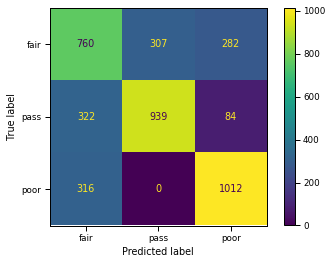

In [65]:
#SVC model
svc = SVC(random_state=599)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
# print accuracy
svcX = svc.predict(X_train)
print('Train Accuracy:', float(accuracy_score(y_train, svcX))*100, '%')
print('Test Accuracy:', float(accuracy_score(y_test, y_pred))*100, '%')
print('Classification Stats:')
print(classification_report(y_test,y_pred))
#plot confusion matrix for logistic regression model
svc1=svc.fit(X_train,y_train)
plot_confusion_matrix(svc1,X_test,y_test)
plt.show

# Tuned SVC Model

# Tuning hyper-parameters for accuracy

Grid scores for the SVC model based on CV:

0.86304 (+/-0.01830) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.89885 (+/-0.01472) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.86304 (+/-0.01830) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.85131 (+/-0.01988) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.86591 (+/-0.01815) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.94308 (+/-0.00554) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.86591 (+/-0.01815) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.91771 (+/-0.00943) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.86591 (+/-0.01808) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.95619 (+/-0.00737) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.86591 (+/-0.01808) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93242 (+/-0.00674) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.86613 (+/-0.01808) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.95854 

<function matplotlib.pyplot.show(close=None, block=None)>

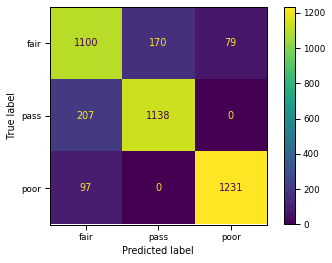

In [66]:
# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf'], 
                   'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
tuned_SVC = GridSearchCV(SVC(random_state=599), grid_parameters, cv=5, scoring='accuracy')
tuned_SVC.fit(X_train,y_train)
# view accuracy scores for all the models
print("Grid scores for the SVC model based on CV:\n")
means = tuned_SVC.cv_results_['mean_test_score']
stds = tuned_SVC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tuned_SVC.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on training set:", tuned_SVC.best_params_)
print("Best model test accuracy:", tuned_SVC.best_score_)

svc_best = clf.best_estimator_
tuned_svc_y_pred = svc_best.predict(X_test)

print('\n\nTuned Model Stats:')
print('Test Classification Stats:')
print(classification_report(y_test,tuned_svc_y_pred))

#plot confusion matrix for logistic regression model
svc2=svc_best.fit(X_train,y_train)
plot_confusion_matrix(svc2,X_test,y_test)
plt.show


# Naive Bayes Model

In [ ]:
#naive bayes model
gnb = GaussianNB()
gnby_pred = gnb.fit(X_train, y_train).predict(X_test)
gnbX = gnb.predict(X_train)
print('Train Accuracy:', float(accuracy_score(y_train, gnbX))*100, '%')
#check the accuracy
print('Test Accuracy:', float(accuracy_score(y_test, gnby_pred))*100, '%')
print('Classification Stats:')
print(classification_report(y_test,gnby_pred))



Train Accuracy: 69.52675335749308 %
Test Accuracy: 69.39333664843362 %
Classification Stats:
              precision    recall  f1-score   support

        fair       0.57      0.69      0.62      1349
        pass       0.85      0.71      0.77      1345
        poor       0.73      0.68      0.70      1328

    accuracy                           0.69      4022
   macro avg       0.71      0.69      0.70      4022
weighted avg       0.71      0.69      0.70      4022



In [ ]:
#confusion matrix
gnb_matrix = metrics.confusion_matrix(y_test, gnby_pred)
gnb_matrix

array([[929, 162, 258],
       [306, 956,  83],
       [409,  13, 906]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

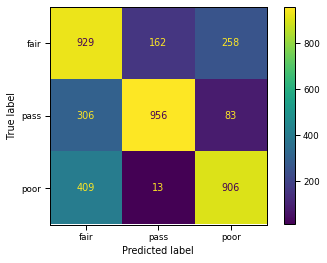

In [ ]:
#plot confusion matrix for gaussian naive bayes model
gnb1=gnb.fit(X_train, y_train)
plot_confusion_matrix(gnb1,X_test,y_test)
plt.show

In [ ]:
#scale Naive Bayes model
gnb = GaussianNB()
gnby_pred1 = gnb.fit(X_scaled, y_train).predict(X_test_scaled)
gnbX1 = gnb.predict(X_scaled)
print('Train Accuracy:', float(accuracy_score(y_train, gnbX1))*100, '%')
#check the accuracy
print('Test Accuracy:', float(accuracy_score(y_test, gnby_pred1))*100, '%')
print('Classification Stats:')
print(classification_report(y_test,gnby_pred1))

Train Accuracy: 69.52675335749308 %
Test Accuracy: 69.94032819492789 %
Classification Stats:
              precision    recall  f1-score   support

        fair       0.57      0.69      0.63      1349
        pass       0.85      0.72      0.78      1345
        poor       0.73      0.69      0.71      1328

    accuracy                           0.70      4022
   macro avg       0.72      0.70      0.70      4022
weighted avg       0.72      0.70      0.70      4022

